# Лабораторная лабота 6. Чукарев Михаил
## Численные методы решения обыкновенных дифференциальных уравнений

In [2]:
import sympy as smp
import numpy as np
from prettytable import PrettyTable 
import matplotlib.pyplot as plt

from scipy.integrate import odeint

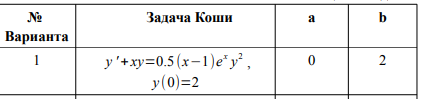

### Выбор шага интегрирования по методу Ренге-Кутта

In [9]:
epsilon = 0.0001
x = smp.Symbol('x')
y = smp.Symbol('y')
F = 0.5*(x-1)*smp.exp(x)*y**2-x*y

newTable = PrettyTable(["h", "np.abs(y1 - y1)/15"])

a = 0
b = 2
h = 0.1

y1 = F.subs([(x, a + h), (y, b)])
y2 = F.subs([(x, a + 2*h), (y, b)])
newTable.add_row([h, np.abs(y1 - y2)/15])
while np.abs(y1 - y2)/15 < epsilon:
    h *= 2
    y1 = F.subs(x, a + h)
    y2 = F.subs(x, a + 2*h)
    newTable.add_row([h, np.abs(y1 - y2)/15])

print(newTable)

n = (b - a)/h
print(n)
h2 = h*2

+-----+--------------------+
|  h  | np.abs(y1 - y1)/15 |
+-----+--------------------+
| 0.1 | 0.0109957840346737 |
+-----+--------------------+
20.0


### Решение задачи Коши методом Ренге-Кутта

+---------------------+-------------------+-------------------+---------------------+
|          x          |        y_h        |        y_2h       |        delta        |
+---------------------+-------------------+-------------------+---------------------+
|          0          |         2         |         2         |          0          |
|         0.1         | 0.959404515377871 |         1         | 0.00270636564147525 |
|         0.2         | 0.916406369474818 | 0.954035490062477 | 0.00250860803917732 |
| 0.30000000000000004 | 0.871880277579031 | 0.954035490062477 | 0.00547701416556312 |
|         0.4         | 0.826606063446673 | 0.902538944129750 | 0.00506219204553845 |
|         0.5         | 0.781261120056448 | 0.902538944129750 | 0.00808518827155344 |
|         0.6         | 0.736419286091069 | 0.902538944129750 |  0.0110746438692454 |
|         0.7         | 0.692554568951370 | 0.902538944129750 |  0.0139989583452253 |
|  0.7999999999999999 | 0.650048260569998 | 0.90253894

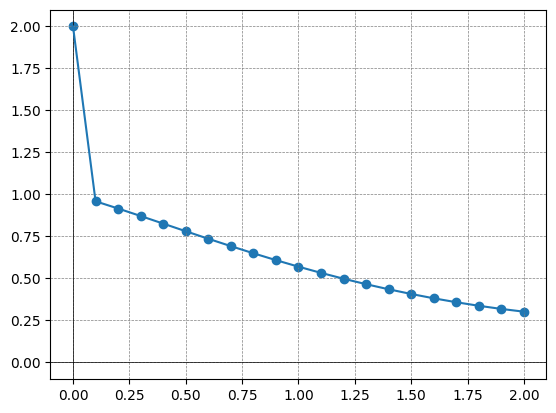

In [10]:
newTable = PrettyTable(["x", "y_h", 'y_2h', 'delta'])
newTable.add_row([a, b, b, 0])
xi = a
y_h = 1
y_2h = 1
x_arr = []
y_arr = []
x_arr.append(a)
y_arr.append(b)
while xi <= b:
    xi += h
    x_arr.append(xi)
    k1 = h*F.subs([(x, xi), (y, y_h)])
    k2 = h*F.subs([(x, xi + h/2), (y, y_h + k1/2)])
    k3 = h*F.subs([(x, xi + h/2), (y, y_h + k2/2)])
    k4 = h*F.subs([(x, xi + h), (y, y_h + k3)])
    y_h += 1/6*(k1 + k2 + k3 + k4)
    y_arr.append(y_h)
    if (xi % h2) == 0 :
        k1 = h*F.subs([(x, xi), (y, y_2h)])
        k2 = h*F.subs([(x, xi + h/2), (y, y_2h + k1/2)])
        k3 = h*F.subs([(x, xi + h/2), (y, y_2h + k2/2)])
        k4 = h*F.subs([(x, xi + h), (y, y_2h + k3)])
        y_2h += 1/6*(k1 + k2 + k3 + k4)
    
    newTable.add_row([xi, y_h, y_2h, np.abs(y_h - y_2h)/15])

print(newTable)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(x_arr, y_arr)
plt.plot(x_arr, y_arr)

### Решение задачи Коши методом Эйлера

+---------------------+-------------------+-------------------+-------+
|          x          |        y_h        |        y_2h       | delta |
+---------------------+-------------------+-------------------+-------+
|          0          |         2         |         2         |   0   |
|         0.1         | 0.940267308686596 | 0.940267308686596 |   0   |
|         0.2         | 0.878268147771645 | 0.878268147771645 |   0   |
| 0.30000000000000004 | 0.815477394283884 | 0.815477394283884 |   0   |
|         0.4         | 0.753096244497244 | 0.753096244497244 |   0   |
|         0.5         | 0.692064462600949 | 0.692064462600949 |   0   |
|         0.6         | 0.633086401497101 | 0.633086401497101 |   0   |
|         0.7         | 0.576663720693940 | 0.576663720693940 |   0   |
|  0.7999999999999999 | 0.523129785938641 | 0.523129785938641 |   0   |
|  0.8999999999999999 | 0.472682571569524 | 0.472682571569524 |   0   |
|  0.9999999999999999 | 0.425414314412572 | 0.425414314412572 | 

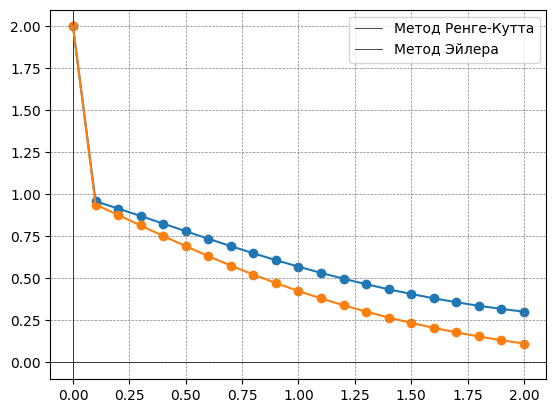

In [11]:
newTable = PrettyTable(["x", "y_h", 'y_2h', 'delta'])
newTable.add_row([a, b, b, 0])
xi = a
y_h = 1
y_2h = 1

x_arr2 = []
y_arr2 = []

x_arr2.append(a)
y_arr2.append(b)
while xi <= b:
    xi += h
    x_arr2.append(xi)
    y_h += h*F.subs([(x, xi), (y, y_h)])
    y_2h += h*F.subs([(x, xi), (y, y_2h)])
    
    y_arr2.append(y_h)
    
    newTable.add_row([xi, y_h, y_2h, np.abs(y_h - y_2h)/15])

print(newTable)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.scatter(x_arr, y_arr)
plt.plot(x_arr, y_arr)

plt.scatter(x_arr2, y_arr2)
plt.plot(x_arr, y_arr2)

plt.legend(['Метод Ренге-Кутта', 'Метод Эйлера'])

+---------------------+-------------------+-------------------+--------------------+
|          x          |     Ренге-Кутт    |       Эйлер       |       Питон        |
+---------------------+-------------------+-------------------+--------------------+
|          0          |         2         |         2         |        2.0         |
|         0.1         | 0.959404515377871 | 0.940267308686596 | 1.991240787593401  |
|         0.2         | 0.916406369474818 | 0.878268147771645 | 1.9698034183873043 |
| 0.30000000000000004 | 0.871880277579031 | 0.815477394283884 | 1.942260741334951  |
|         0.4         | 0.826606063446673 | 0.753096244497244 | 1.9140473115318102 |
|         0.5         | 0.781261120056448 | 0.692064462600949 | 1.8897495828031847 |
|         0.6         | 0.736419286091069 | 0.633086401497101 | 1.8738621421132957 |
|         0.7         | 0.692554568951370 | 0.576663720693940 | 1.8720688187469214 |
|  0.7999999999999999 | 0.650048260569998 | 0.523129785938641 | 1

C:\Users\misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


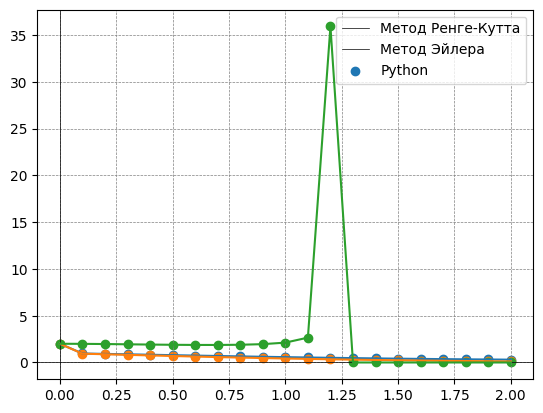

In [15]:
def FF(x, y):
    return 0.5*(x-1)*np.exp(x)*y**2-x*y

yy = odeint(FF, b, x_arr).flatten()
newTable = PrettyTable(["x", "Ренге-Кутт", 'Эйлер', 'Питон'])
for i in range(len(x_arr)):
    newTable.add_row([x_arr[i], y_arr[i], y_arr2[i], yy[i]])
print(newTable)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.scatter(x_arr, y_arr)
plt.plot(x_arr, y_arr)

plt.scatter(x_arr2, y_arr2)
plt.plot(x_arr, y_arr2)

plt.scatter(x_arr, yy)
plt.plot(x_arr, yy)

plt.legend(['Метод Ренге-Кутта', 'Метод Эйлера', 'Python'])